In [224]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')


In [225]:
df = pd.read_csv('LoanPrediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,Y,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,N,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,Y,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,Y,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,Y,1.0,Urban


In [226]:
df['LoanAmount']=pd.to_numeric(df['LoanAmount']) # df reads the data in string as we have to perform operation on loan amount 
                                                 # we are converting it into numeric

In [227]:
df.drop('Loan_ID',axis=1,inplace=True)  # removing the load_ID as it has no relation with LoadAmount

In [228]:
df.head()



,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,Y,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,N,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,Y,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,Y,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,Y,1.0,Urban


In [229]:
df.shape  # we have 614 rows and 12 cols

(614, 12)

In [230]:
# removing all the rows where loan amount is not present 
print df['LoanAmount'][2]
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()
#for i in range(0,614):
 #   if(df[LoanAmount].isnull())
  #  print i


66.0


Gender              13
Married              3
Dependents          15
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
dtype: int64

In [231]:
#print df.loc[3:4]
#print df.iloc[:,8]
import math
for i in range(0,200):
    if math.isnan(df.iloc[i,8]):
        print i
        print(df.iloc[i,8])
        df.drop(i,inplace=True)

#here we can fill or remove the null datasets 
        


19
nan
35
nan
42
nan
70
nan
108
nan
160
nan
191
nan


In [232]:
df.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,607.000000,607.000000,586.000000,594.000000,558.000000
mean,5419.403624,1618.074003,146.477816,341.818182,0.842294
std,6132.090713,2938.799549,85.883525,65.423724,0.364792
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2891.500000,0.000000,100.000000,360.000000,1.000000
50%,3816.000000,1167.000000,128.000000,360.000000,1.000000
75%,5807.500000,2279.000000,167.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [233]:
df.groupby(['ApplicantIncome', 'Credit_History','Dependents']).mean() 

,,,CoapplicantIncome,LoanAmount,Loan_Amount_Term
ApplicantIncome,Credit_History,Dependents,,,
150,1.0,0,1800.0,135.0,360.0
210,1.0,2,2917.0,98.0,360.0
645,1.0,0,3683.0,113.0,480.0
674,1.0,0,5296.0,168.0,360.0
1000,1.0,1,3022.0,110.0,360.0
1025,1.0,0,2773.0,112.0,360.0
1299,1.0,2,1086.0,17.0,120.0
1378,1.0,2,1881.0,167.0,360.0
1442,1.0,0,0.0,35.0,360.0


In [234]:
df['LoanAmount'].describe()

count    586.000000
mean     146.477816
std       85.883525
min        9.000000
25%      100.000000
50%      128.000000
75%      167.750000
max      700.000000
Name: LoanAmount, dtype: float64

In [235]:
loan_correlation = df.corr()
loan_correlation

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.115467,0.571517,-0.044872,-0.015258
CoapplicantIncome,-0.115467,1.000000,0.187656,-0.059979,0.000755
LoanAmount,0.571517,0.187656,1.000000,0.039580,-0.004522
Loan_Amount_Term,-0.044872,-0.059979,0.039580,1.000000,0.001829
Credit_History,-0.015258,0.000755,-0.004522,0.001829,1.000000


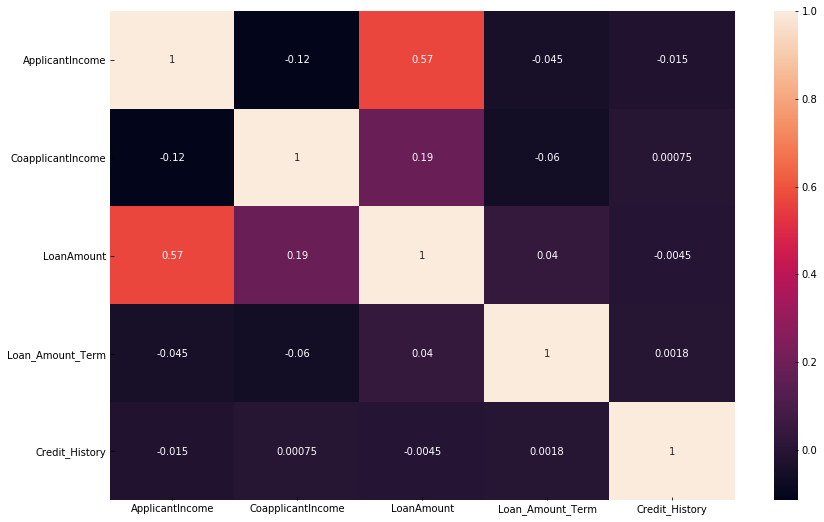

In [236]:
f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(loan_correlation, 
            xticklabels=loan_correlation.columns.values,
            yticklabels=loan_correlation.columns.values,annot= True)
plt.show()